### დავალება

### მონაცემების შემოტანა დრაივიდან

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ბიბლიოთეკების შემოტანა

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

### მონაცემთა დამუშავება

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data['Age'] = data['Age'].fillna(data["Age"].median())
data.drop(["Cabin", "PassengerId", "Ticket", "Survived"], axis=1, inplace=True)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})
data['Embarked'] = data['Embarked'].map({'S':0,'C':1, 'Q':2})
data["Age"] = data['Age'].astype(int)

In [ ]:
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
     'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
data['Title'] = LabelEncoder().fit_transform(data['Title'])

In [ ]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,3
2,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,0,3
4,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,0,2


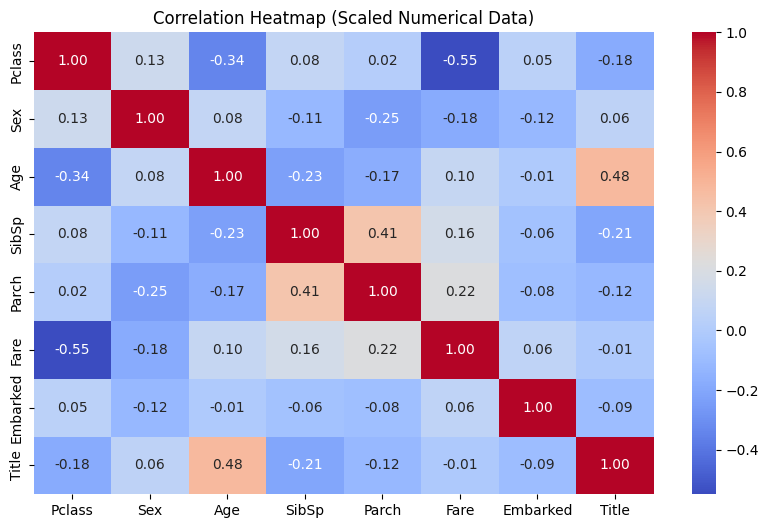

In [ ]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)
scaled_df

plt.figure(figsize=(10, 6))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Scaled Numerical Data)')
plt.show()

### მოდელის ტრენინგი

In [ ]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,1,3
2,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,0,3
4,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,0,2


In [ ]:
feat_list = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Title"]
features = data[feat_list]
label = data['Age']

In [ ]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=100)

In [ ]:
features_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
408,3,1,0,0,7.7750,0,2
480,3,1,5,2,46.9000,0,0
510,3,1,0,0,7.7500,2,2
609,1,0,0,0,153.4625,0,1
547,2,1,0,0,13.8625,1,2
...,...,...,...,...,...,...,...
855,3,0,0,1,9.3500,0,3
871,1,0,1,1,52.5542,0,3
835,1,0,1,1,83.1583,1,1
792,3,0,8,2,69.5500,0,1


In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=9, random_state=100)
model.fit(features_train, label_train)
trained_predictions = model.predict(features_test)

print("MAE:", mean_absolute_error(label_test, trained_predictions))
print("MSE:", mean_squared_error(label_test, trained_predictions))
print("R² Score:", r2_score(label_test, trained_predictions))

MAE: 6.445490447888615
MSE: 84.83709317397626
R² Score: 0.47361652845691093
